#**Data Preprocessing**

##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
from sklearn import metrics


##Import Dataset

In [2]:
df = pd.read_csv('hr_datset.csv')
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


##check shape of dataset

In given dataset there are 5000 rows and 20 columns

In [3]:
df.shape

(5000, 20)

##Information of dataset

Here we check information of dataset such data types and NaN values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

##Describe the dataset


describe() describes min, max, mean, count, etc values of individual continous feature.

In [5]:
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


##Print Column names

To show all the columns name of the given dataset

In [6]:
count = 0
for x in df:
  count = count + 1
  print(count, x)

1 Gender
2 Business
3 Dependancies
4 Calls
5 Type
6 Billing
7 Rating
8 Age
9 Salary
10 Base_pay
11 Bonus
12 Unit_Price
13 Volume
14 openingbalance
15 closingbalance
16 low
17 Unit_Sales
18 Total_Sales
19 Months
20 Education


##Check NaN value

By checking nan value we found that few features have nan value scuh as Base_pay has 23 nan value, openingbalance has 1476 nan value and Total_Sales has 8 nan value

In [7]:
df.isna().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

##Check nan value by graph

Here we showing nan value by ploting garph

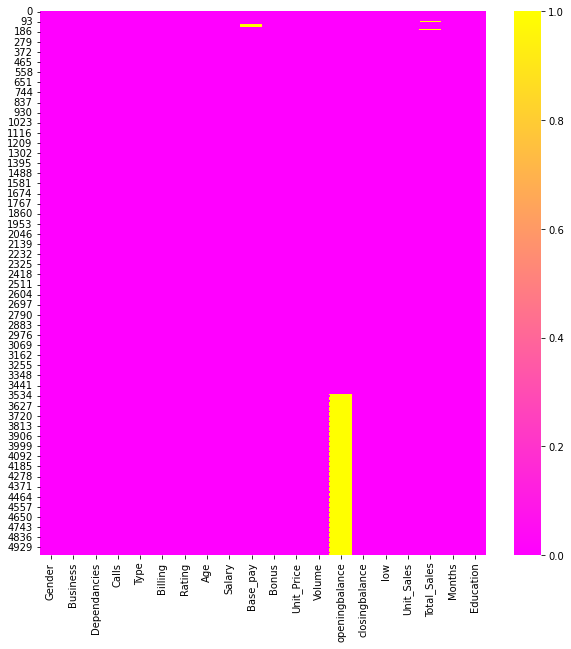

In [8]:
f = plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(), cmap='spring')

##Convert Total_Sales string into numeric form

In given dataset, Total_Sales feature is string datatype so, for filing nan value first convert it into numneric for or int datatype

In [9]:
df["Total_Sales"] = pd.to_numeric(df["Total_Sales"] ,errors='coerce')

##Fill nan value

For filling all nan value first find mean of the same column then put all the mean value inplace of nan values

In [10]:
df['Base_pay']=df['Base_pay'].fillna(df['Base_pay'].mean())
df['Total_Sales']=df['Total_Sales'].fillna(df['Total_Sales'].mean())
df['openingbalance']=df['openingbalance'].fillna(df['openingbalance'].mean())

##After fill nan value check again nan value

After fill all nan value again check or confirm is there any more nan value or not

In [11]:
df.isna().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

#**Exploratory Data Analysis**


In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be boring, and/or overwhelming to derive insights by looking at plain numbers. 

##Gender Feature


First count the categories of Gender feature i.e 2528 or 50.56%  **"Male"** values and 2472 or 49.44%  **"Female"** values. Then plot a graph in numerical bar and pie chart.

Male      2528
Female    2472
Name: Gender, dtype: int64



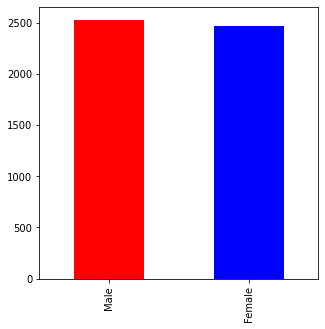

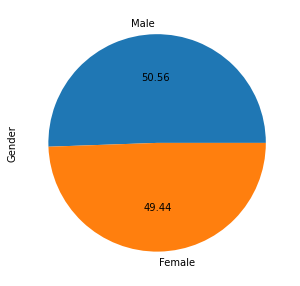

In [12]:
print(df.Gender.value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Gender'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
f1 = plt.figure(figsize = (5,5))
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

##Business Feature


First count the categories value Business feature i.e 4200 or 84% contains 0 values which means **"Non-Business" Man** and 800 or 16% contains 1 which means **"Business Man"**.Then plot a garph numerical bar and pie chart

0    4200
1     800
Name: Business, dtype: int64
0 = NoN Business
1 = Business


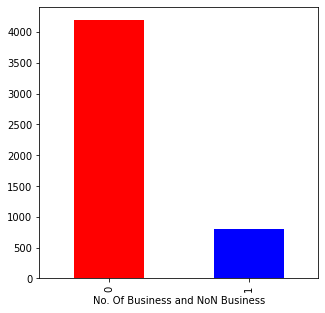

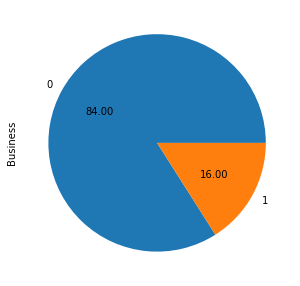

In [13]:
print(df["Business"].value_counts())
f = plt.figure(figsize = (5,5))
df['Business'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
print("0 = NoN Business")
print("1 = Business")
plt.xlabel("No. Of Business and NoN Business")
f1 = plt.figure(figsize = (5,5))
df['Business'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

##Dependancies Feature


First count the categories of Dependancies feature i.e 3524 or 70.48% No values which means **"No people dependent on the person"** and 1476 or 29.52% Yes values which means **"people dependent on the person"**. Then plot a graph in numerical bar and pie chart.

No     3524
Yes    1476
Name: Dependancies, dtype: int64



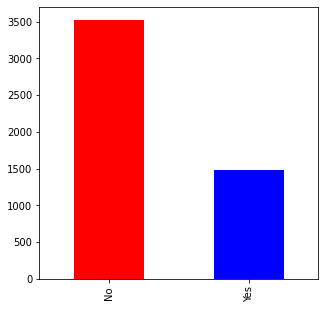

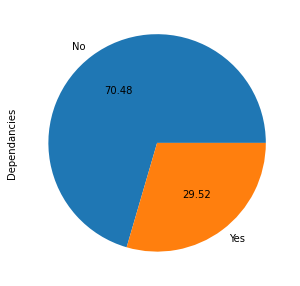

In [14]:
print(df.Dependancies.value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Dependancies'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
f1 = plt.figure(figsize = (5,5))
df['Dependancies'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

##Calls Feature


First count the categories of Calls feature i.e 4539 or 90.78% Yes values which means **"Person has authority to make call"** and 461 or 9.22% No values which means **"Person has no authority to make call"**. Then plot a graph in numerical bar and pie chart.

Yes    4539
No      461
Name: Calls, dtype: int64

NoneNone


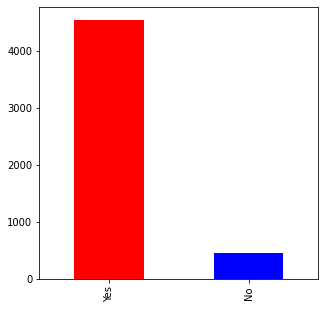

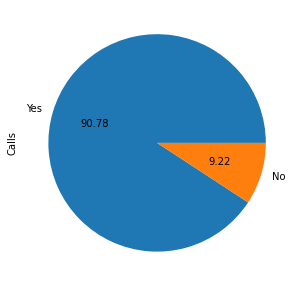

In [15]:
print(df.Calls.value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Calls'].value_counts().plot(kind="bar",color=["red","blue"])
f1 = plt.figure(figsize = (5,5))
df['Calls'].value_counts().plot(kind="pie", autopct="%.2f")
print(f.show(),end = "")
print(f1.show())

##Type Feature


First count the categories of Type(**"Salary settlement type"**) feature i.e 2777 or 55.54% **"Month-to-month"** values and 1195 or 23.90% **"Two year"** values and 1028 or 20.56% **"One year"** values. Then plot a graph in numerical bar and pie chart.

Month-to-month    2777
Two year          1195
One year          1028
Name: Type, dtype: int64



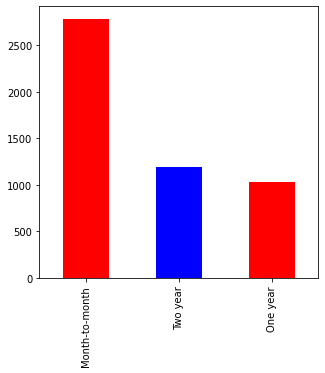

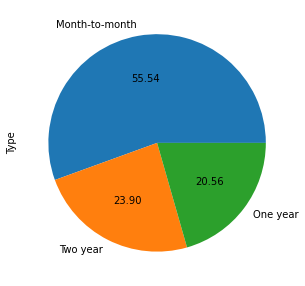

In [16]:
print(df.Type.value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Type'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
f1 = plt.figure(figsize = (5,5))
df['Type'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

##Billing Feature


First count the categories of Billing feature i.e 2956 or 59.12% Yes values which means **"Subscribed to plans**" and 2044 or 40.88% No values which means **"No Subscribed to plans"**. Then plot a graph in numerical bar and pie chart.

Yes    2956
No     2044
Name: Billing, dtype: int64



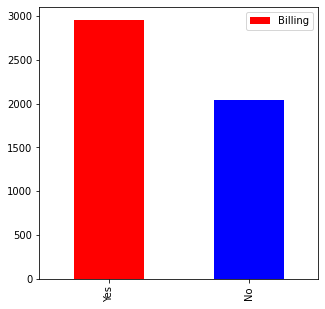

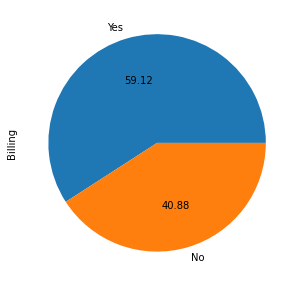

In [17]:
print(df['Billing'].value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Billing'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
plt.legend(loc='best')
f1 = plt.figure(figsize = (5,5))
df['Billing'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

##Rating Feature


First count the categories of Rating feature i.e 3682 or 73.64% No values which means **"No Rating by a Superior"** and 1318 or 26.36% Yes values which means **"Rating by a Superior"**. Then plot a graph in numerical bar and pie chart.

No     3682
Yes    1318
Name: Rating, dtype: int64



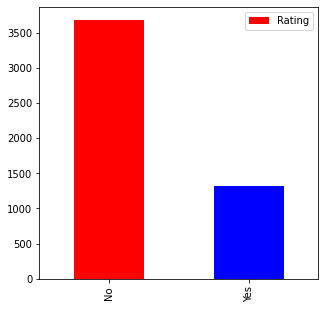

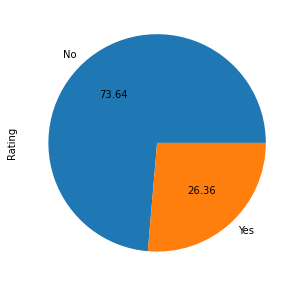

In [18]:
print(df['Rating'].value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Rating'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
plt.legend(loc='best')
f1 = plt.figure(figsize = (5,5))
df['Rating'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

##Education Feature


First count the categories of Education feature i.e 2979 or 59.58% **"PG Education"** values and 1980 or 39.60% **"Graduation Education"** values and 27 or 0.54% **"Intermediate Education"** values and 14 or 0.286% **"High School Education"** values. Then plot a graph in numerical bar and pie chart.

PG                     2979
Graduation             1980
Intermediate             27
High School or less      14
Name: Education, dtype: int64



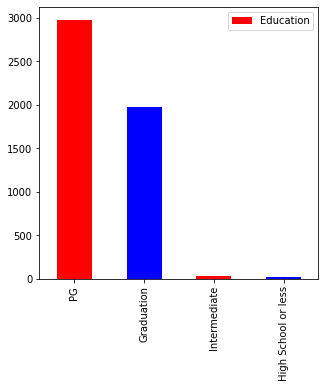

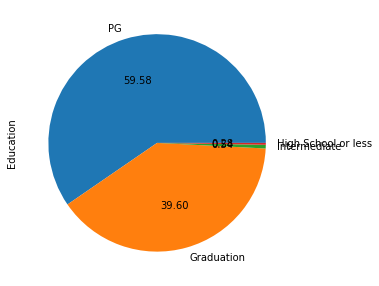

In [19]:
print(df['Education'].value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Education'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
plt.legend(loc='best')
f1 = plt.figure(figsize = (5,5))
df['Education'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

##Continous value features


After looking categorical features, Comes on continous value feature.
*   Age feature => {"min age":18, "max age":88}
*   Salary feature => {"min salary":5089, "max Salary":199970}
*   Bonus feature => {"min Bonus":254, "max Bonus":9998}
*   Base_pay feature => {"min Base_pay":2035, "max Base_pay":79988}
*   Unit_Price feature => {"min Unit_Price":1.44, "max Unit_Price":629.51}
*   Volume feature => {"min Volume":0000, "max Volume":3.208}
*   openingbalance feature => {"min O_balance":3.68, "max O_balance":313.90}
*   closingbalance feature => {"min C_balance":3.68, "max C_balance":313.68}
*   low feature => {"min low":3.65, "max low":312.43}
*   Unit_Sales feature => {"min Unit_Sales":18.25, "max Unit_Sales":118.75}
*   Total_Sales feature => {"min Total_Sales":18.8, "max Total_Sales":120}
*   Months feature => {"min Months":0, "max Months":72}
   



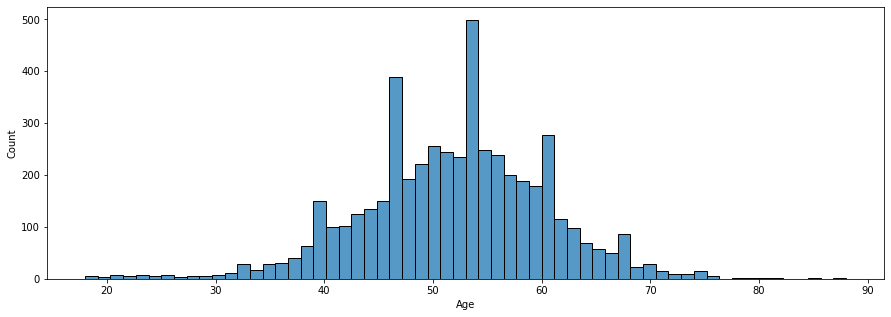

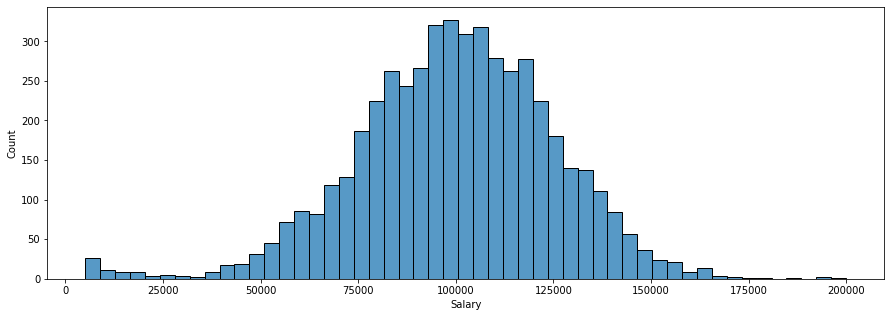

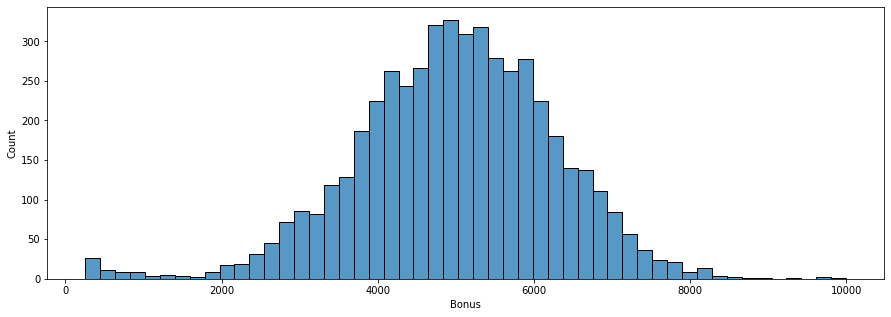

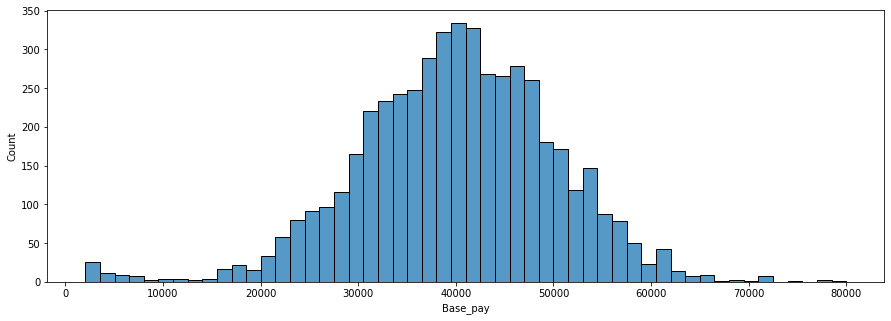

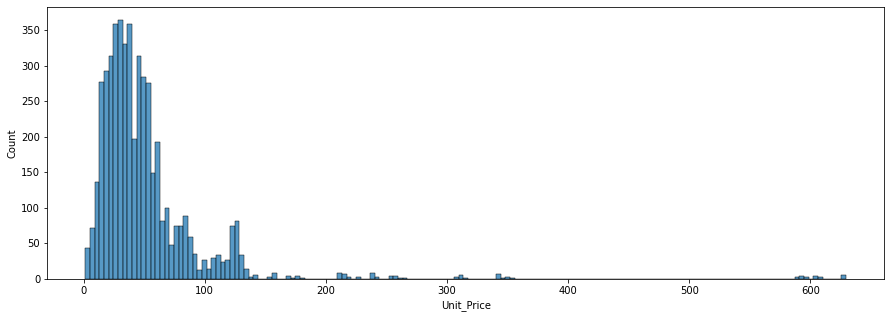

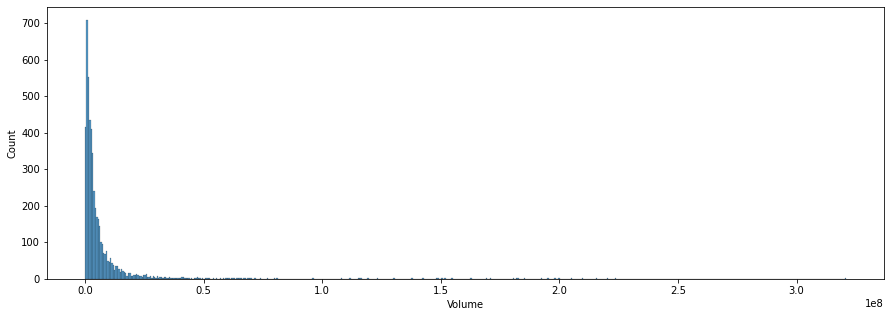

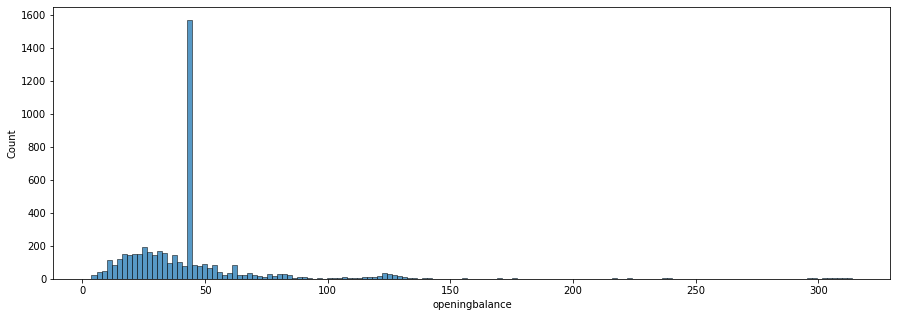

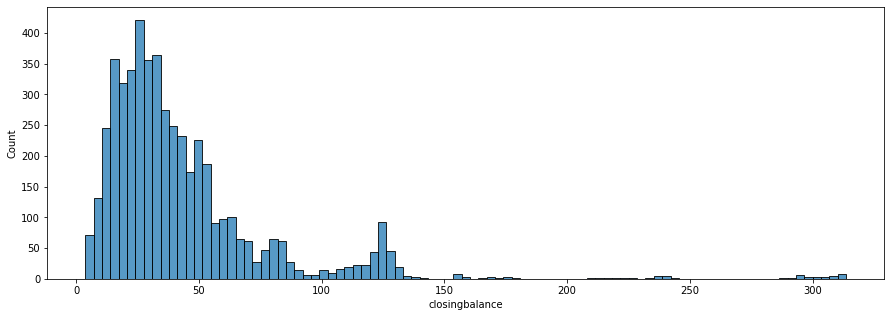

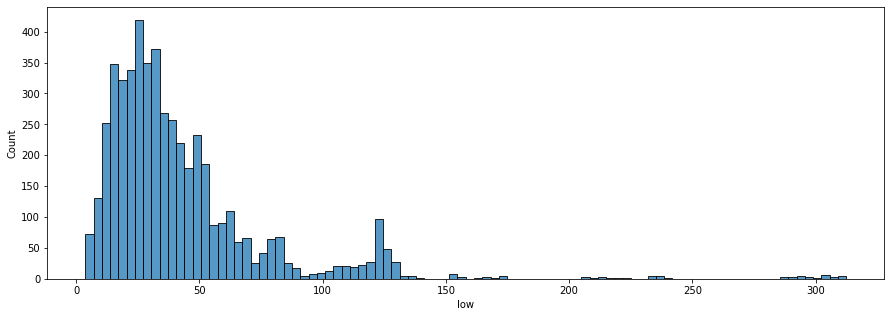

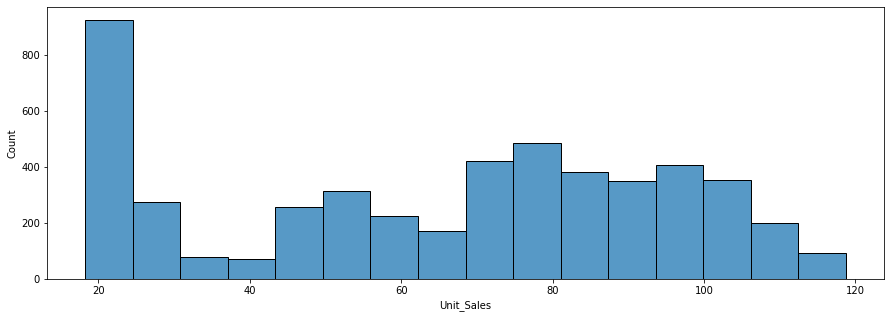

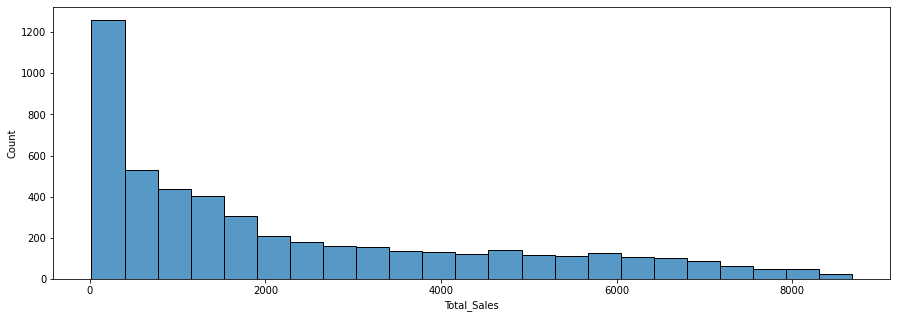

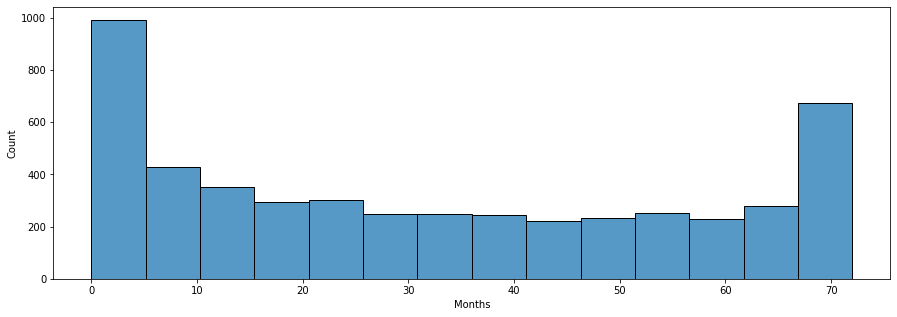

In [20]:
plt.figure(figsize = (15,5))
sns.histplot(df.Age)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Salary)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Bonus)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Base_pay)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Unit_Price)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Volume)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.openingbalance)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.closingbalance)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.low)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Unit_Sales)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Total_Sales)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Months)
print()

##Age vs Salary 


X-axis contain Age and Y-axis contain Salary value, here we see that as per age is increasing salary is also increasing.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


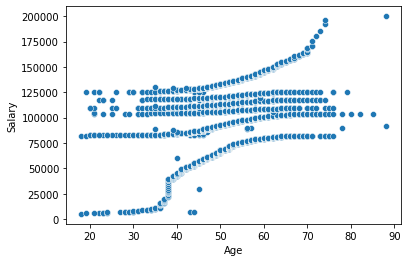

In [21]:
sns.scatterplot(df.Age,df.Salary)

##Education vs Salary


X-aixs contain Education qualification and Y-axis contain Slary.In this graph we see that higher education qualification has more salary and lower eduction has very less salary

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


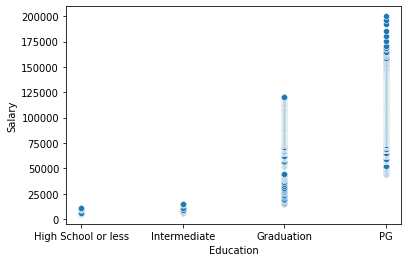

In [22]:
sns.scatterplot(df.Education,df.Salary)

##Months vs Salary

X-axis contain Months and Y-axis contain Salary value, here we see that as per Months of experience is increasing salary is also increasing.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


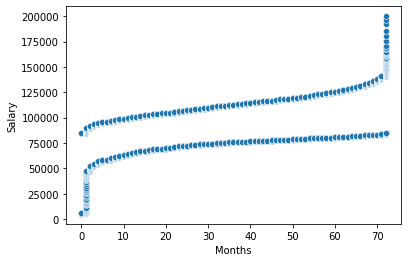

In [23]:
sns.scatterplot(df.Months,df.Salary)

##Salary vs Bonus


X-axis contain Salary and Y-axis contain Bonus value, here we see that as per Salary is increasing Bonus is also increasing.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


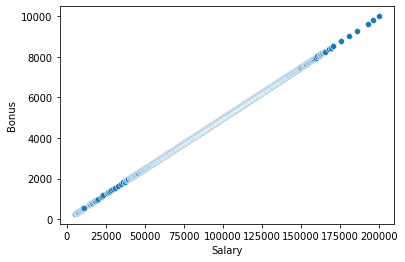

In [24]:
sns.scatterplot(df.Salary,df.Bonus)

##Visualization between Gender and Education of Business and Non Business and thier Salary


In this graph we see that 

*   Those male and female are Non-business and high school or intermediate educational backgroud have more Salary than those male and female having same educational background who are Business man.

*  Those male and female are Business and graduation or pg educational backgroud have more Salary than those male and female having same educational background who are Non-business man.



<Figure size 1080x360 with 0 Axes>

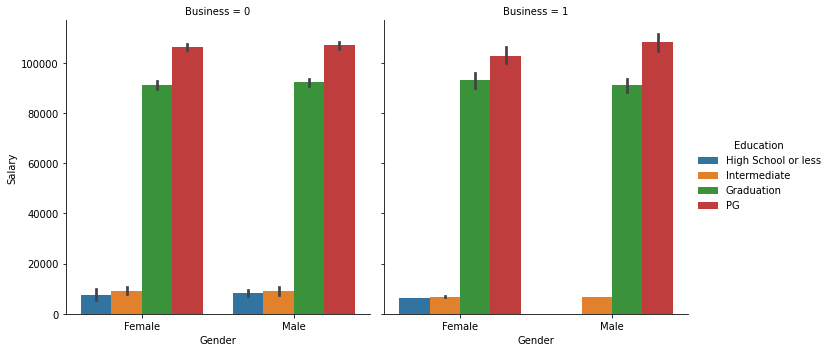

In [25]:
plt.figure(figsize = (15,5))
g = sns.catplot(x="Gender", y="Salary",
                hue="Education", col="Business",
                data=df, kind="bar",
                height=5, aspect=.99);

##Visualization between Gender and Business of Total_Sales and their Duration_Type


In this graph we see that


*   In Month-to-Month durantion type, Non-business female has more Total_Sales than Female Business and approximate equals Total_Sales of male Business and Non-Business.
*   IN One Year duration type, Non-business female has less Total_Sales than Female Business and Non-business male has more Total_Sales than Male Business.
*   IN Two Year duration type, Non-business female has more Total_Sales than Female Business and Non-business male has less Total_Sales than Male Business.



<Figure size 1080x360 with 0 Axes>

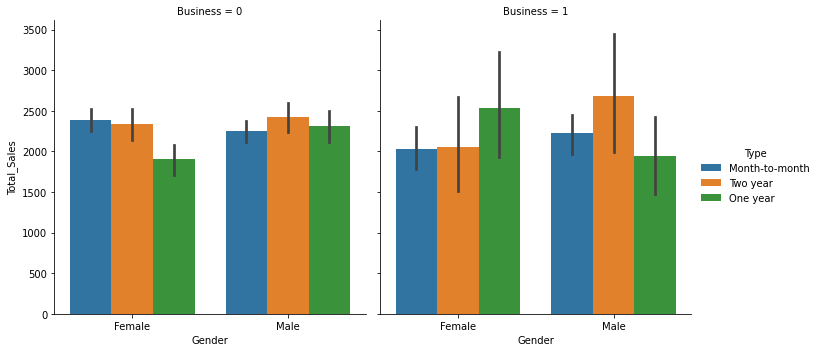

In [26]:
plt.figure(figsize = (15,5))
g = sns.catplot(x="Gender", y="Total_Sales",
                hue="Type", col="Business",
                data=df, kind="bar",
                height=5, aspect=.99);

##Months vs Rating of Gender


In this catplot graph we see that both male and female got apporox equal rating and and not rating by superior

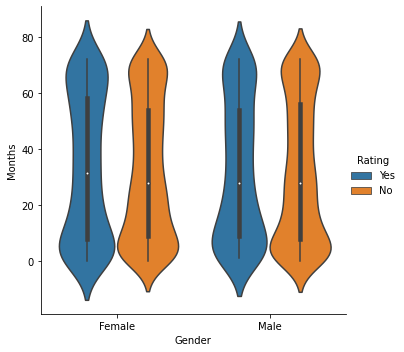

In [27]:
sns.catplot(x = 'Gender', y = 'Months', hue = 'Rating', data = df, kind = 'violin')

##Gender vs Salary Of Business and Non Business

In this catplot graph we see that the male Business and Non-Business man has getting more salary than female business and non business.

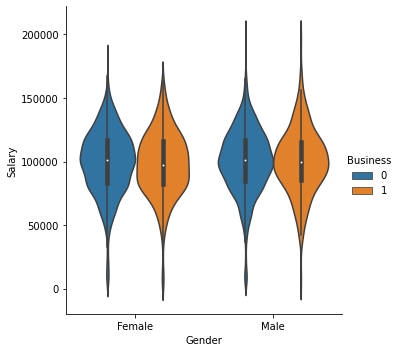

In [28]:
import seaborn as sns
sns.catplot(x = 'Gender', y = 'Salary', hue = 'Business', data = df, kind = 'violin')

##HeatMap


Heatmap is a way to show some sort of matrix plot. To use a heatmap the data should be in a matrix form. By matrix we mean that the index name and the column name must match in some way so that the data that we fill inside the cells are relevant.

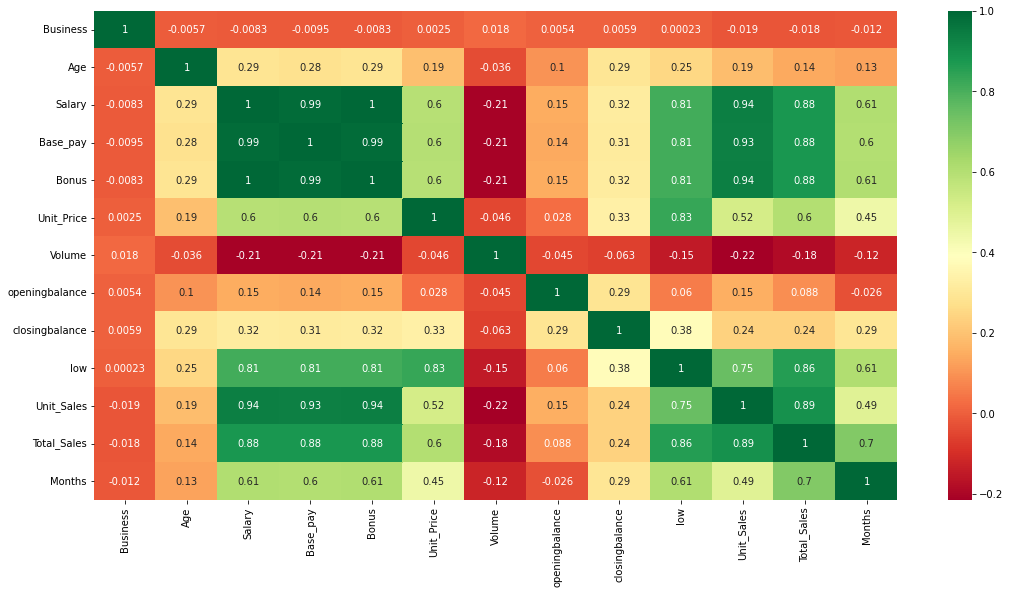

In [29]:
plt.figure(figsize = (18,9))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

#**Feature Engineering**

##Drop unused columns

In [30]:
df.drop(["Dependancies", "Calls", "Billing", "Type"], axis = 1, inplace = True)

##import labelencoder

In [31]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

##convert Gender column in categorical value
Male : 1 and
Female : 0

In [32]:
df['Gender']= encode.fit_transform(df['Gender'])

##convert Rating column in categorical value
Yes : 1 and No : 0

In [33]:
df['Rating']= encode.fit_transform(df['Rating'])

##convert Education column in categorical value
"High School less" : 1    and "Intermediate" : 2
and "Graduation" : 2   and "PG" :4

In [34]:
df['Education'] = df['Education'].map({'High School or less':1, 'Intermediate':2, 'Graduation':3, 'PG':4})

In [35]:
df.head()

,Gender,Business,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,0,0,1,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,1
1,0,0,1,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,1
2,1,0,0,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,1
3,0,1,1,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,1
4,1,0,1,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,1


##Decleared dependent and independent value 

In [36]:
x = df.drop(['Salary', 'Base_pay', 'Volume', 'low', 'Unit_Sales'] , axis = 1)
y = df['Salary']

In [37]:
x

,Gender,Business,Rating,Age,Bonus,Unit_Price,openingbalance,closingbalance,Total_Sales,Months,Education
0,0,0,1,18,254.4500,3.770000,3.75000,3.760000,18.800000,0,1
1,0,0,1,19,284.9060,3.740000,3.85000,3.680000,18.850000,0,1
2,1,0,0,22,294.8325,3.890000,4.23000,4.290000,18.900000,0,1
3,0,1,1,21,306.2560,4.350000,4.26000,4.310000,19.000000,0,1
4,1,0,1,23,312.2500,4.340000,4.79000,4.410000,19.050000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,72,9034.8400,629.511067,43.92202,293.838840,2272.373977,72,4
4996,1,0,0,73,9284.2950,627.841071,43.92202,301.311314,2272.373977,72,4
4997,1,0,0,74,9631.8400,625.860033,43.92202,306.040009,2272.373977,72,4
4998,1,1,1,74,9798.5350,629.510005,43.92202,308.579987,2272.373977,72,4


In [38]:
y

0         5089.00
1         5698.12
2         5896.65
3         6125.12
4         6245.00
          ...    
4995    180696.80
4996    185685.90
4997    192636.80
4998    195970.70
4999    199970.74
Name: Salary, Length: 5000, dtype: float64

##Train-Test split

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.25 , random_state = 0)

#**Model Creation**

Here we create differnt machine learning model

##Linear Regression

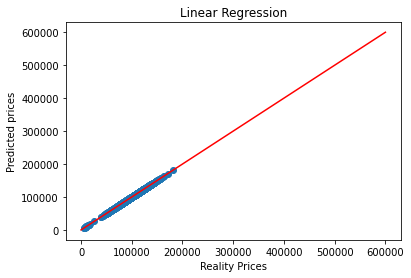

<Figure size 432x288 with 0 Axes>

In [40]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)
plt.scatter(y_test, y_pred_LR)
plt.plot([100000*x for x in range(7)], [100000*x for x in range(7)], color = 'r')
plt.xlabel("Reality Prices")
plt.ylabel("Predicted prices")
plt.title('Linear Regression')
plt.show()
plt.clf()

##Decision Tree Regressor

Max_depth = 1 score : 0.609
Max_depth = 2 score : 0.857
Max_depth = 3 score : 0.965
Max_depth = 4 score : 0.989
Max_depth = 5 score : 0.997
Max_depth = 6 score : 0.999
Max_depth = 7 score : 1.0
Max_depth = 8 score : 1.0
Max_depth = 9 score : 1.0
Max_depth = 10 score : 1.0
Max_depth = 11 score : 1.0
Max_depth = 12 score : 1.0
Max_depth = 13 score : 1.0
Max_depth = 14 score : 1.0
Max_depth = 15 score : 1.0
Max_depth = 16 score : 1.0
Max_depth = 17 score : 1.0
Max_depth = 18 score : 1.0
Max_depth = 19 score : 1.0
Max_depth = 20 score : 1.0


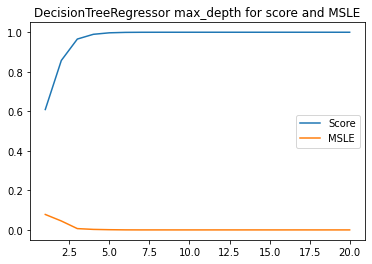

<Figure size 432x288 with 0 Axes>

In [41]:
from sklearn.tree import DecisionTreeRegressor
DTR_score = []
DTR_mean_square_root = []
for i in range(20):
    DTR = DecisionTreeRegressor(max_depth = i+1).fit(x_train, y_train)
    DTR_score.append(DTR.score(x_test, y_test))
    DTR_mean_square_root.append(mean_squared_log_error(y_test, DTR.predict(x_test)))
    print(f'Max_depth = {i+1} score :', DTR.score(x_test, y_test).round(3))
plt.plot([x+1 for x in range(20)], DTR_score, label = 'Score')
plt.plot([x+1 for x in range(20)], DTR_mean_square_root, label = 'MSLE')
plt.title('DecisionTreeRegressor max_depth for score and MSLE')
plt.legend()
plt.show()
plt.clf()

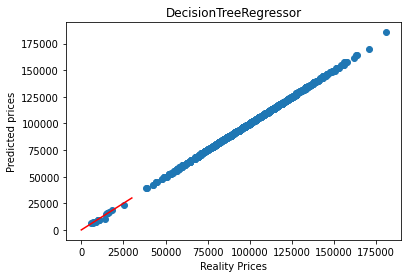

<Figure size 432x288 with 0 Axes>

In [42]:
DTR = DecisionTreeRegressor(max_depth = 7).fit(x_train, y_train)
y_pred_DTR = DTR.predict(x_test)
plt.scatter(y_test, y_pred_DTR)
plt.plot([5000*x for x in range(7)], [5000*x for x in range(7)], color = 'r')
plt.xlabel("Reality Prices")
plt.ylabel("Predicted prices")
plt.title('DecisionTreeRegressor')
plt.show()
plt.clf()

##Random Forest Regressor

Max_depth = 1 score : 0.629
Max_depth = 2 score : 0.879
Max_depth = 3 score : 0.978
Max_depth = 4 score : 0.996
Max_depth = 5 score : 1.0
Max_depth = 6 score : 1.0
Max_depth = 7 score : 1.0
Max_depth = 8 score : 1.0
Max_depth = 9 score : 1.0
Max_depth = 10 score : 1.0
Max_depth = 11 score : 1.0
Max_depth = 12 score : 1.0
Max_depth = 13 score : 1.0
Max_depth = 14 score : 1.0
Max_depth = 15 score : 1.0
Max_depth = 16 score : 1.0
Max_depth = 17 score : 1.0
Max_depth = 18 score : 1.0
Max_depth = 19 score : 1.0
Max_depth = 20 score : 1.0


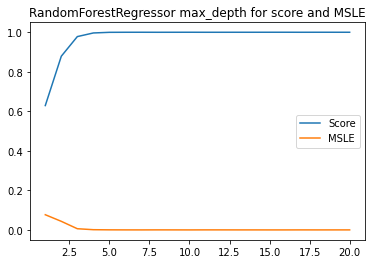

<Figure size 432x288 with 0 Axes>

In [43]:
from sklearn.ensemble import RandomForestRegressor
RFR_score = []
RFR_mean_square_root = []
for i in range(20):
    RFR = RandomForestRegressor(max_depth = i+1).fit(x_train, y_train)
    RFR_score.append(RFR.score(x_test, y_test))
    RFR_mean_square_root.append(mean_squared_log_error(y_test, RFR.predict(x_test)))
    print(f'Max_depth = {i+1} score :', RFR.score(x_test, y_test).round(3))
plt.plot([x+1 for x in range(20)], RFR_score, label = 'Score')
plt.plot([x+1 for x in range(20)], RFR_mean_square_root, label = 'MSLE')
plt.title('RandomForestRegressor max_depth for score and MSLE')
plt.legend()
plt.show()
plt.clf()

N_neighbor = 50 score : 1.0
N_neighbor = 100 score : 1.0
N_neighbor = 150 score : 1.0
N_neighbor = 200 score : 1.0
N_neighbor = 250 score : 1.0
N_neighbor = 300 score : 1.0
N_neighbor = 350 score : 1.0
N_neighbor = 400 score : 1.0
N_neighbor = 450 score : 1.0
N_neighbor = 500 score : 1.0


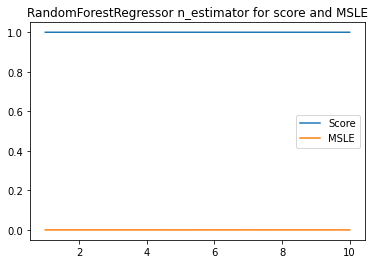

<Figure size 432x288 with 0 Axes>

In [44]:
RFR_score = []
RFR_mean_square_root = []
for i in range(10):
    RFR = RandomForestRegressor(max_depth = 15, n_estimators = (i+1)*50).fit(x_train, y_train)
    RFR_score.append(RFR.score(x_test, y_test))
    RFR_mean_square_root.append(mean_squared_log_error(y_test, RFR.predict(x_test)))
    print(f'N_neighbor = {(i+1)*50} score :', RFR.score(x_test, y_test).round(3))
plt.plot([x+1 for x in range(10)], RFR_score, label = 'Score')
plt.plot([x+1 for x in range(10)], RFR_mean_square_root, label = 'MSLE')
plt.title('RandomForestRegressor n_estimator for score and MSLE')
plt.legend()
plt.show()
plt.clf()

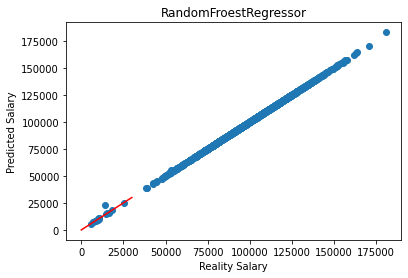

<Figure size 432x288 with 0 Axes>

In [45]:
RFR = RandomForestRegressor(max_depth = 15, n_estimators = 100).fit(x_train, y_train)
y_pred_RFR = RFR.predict(x_test)
plt.scatter(y_test, y_pred_RFR)
plt.plot([5000*x for x in range(7)], [5000*x for x in range(7)], color = 'r')
plt.xlabel("Reality Salary")
plt.ylabel("Predicted Salary")
plt.title('RandomFroestRegressor')
plt.show()
plt.clf()

##Support Vector Regressor

In [46]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', gamma = 'auto', C = 10, degree=1, epsilon=0.1, coef0=1).fit(x_train, y_train)
print('Score :', svr.score(x_test, y_test))
print('MSLE :', mean_squared_log_error(y_test, svr.predict(x_test)))

Score : 0.00022734135506752295
MSLE : 0.13062419596583408


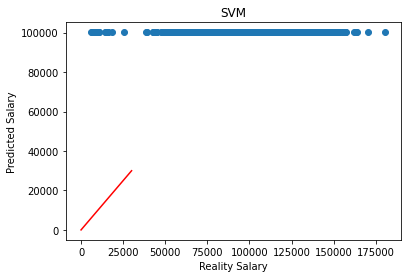

<Figure size 432x288 with 0 Axes>

In [47]:
y_pred_svr = svr.predict(x_test)
plt.scatter(y_test, y_pred_svr)
plt.plot([5000*x for x in range(7)], [5000*x for x in range(7)], color = 'r')
plt.xlabel("Reality Salary")
plt.ylabel("Predicted Salary")
plt.title('SVM')
plt.show()
plt.clf()

##Create and fit all ML Model

In [48]:
from numpy.ma.core import shape
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
def model_fit(x_train, x_test, y_train, y_test):
  
  from sklearn.linear_model import LinearRegression
  LR = LinearRegression().fit(x_train, y_train)

  from sklearn.ensemble import RandomForestRegressor
  RFR = RandomForestRegressor(max_depth = 15, n_estimators = 100).fit(x_train, y_train)

  from sklearn.tree import DecisionTreeRegressor
  DTR = DecisionTreeRegressor(max_depth = 7).fit(x_train, y_train)

  from sklearn.svm import SVR
  svr = SVR(kernel = 'rbf').fit(x_train, y_train)
  return LR, RFR, DTR, svr

In [49]:
Model = model_fit(x_train, x_test, y_train, y_test)

#Comparsion the prediction Salary and reality Salary of all model


After completion of comparsion model, we found that, LinearRegression, RandomForestRegressor, DecisionTreeRegressor predict approx same Salary and SupportVectorRegressor predict different salary compared to actual salary

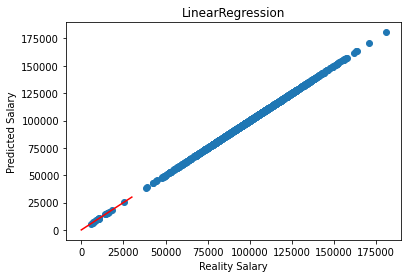

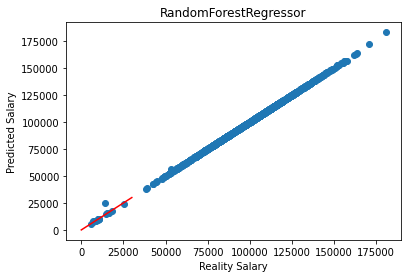

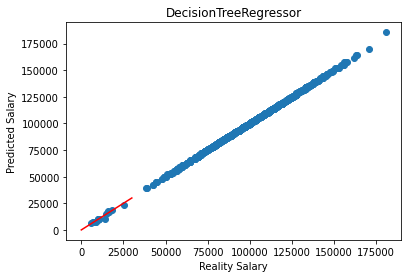

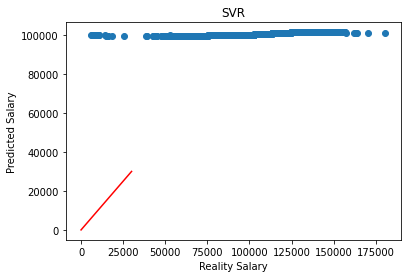

<Figure size 432x288 with 0 Axes>

In [50]:
ML_model = ['LinearRegression', 'RandomForestRegressor', 'DecisionTreeRegressor', 'SVR']
for i in range(4):
  plt.scatter(y_test, Model[i].predict(x_test))
  plt.plot([5000*x for x in range(7)], [5000*x for x in range(7)], color = 'r')
  plt.xlabel("Reality Salary")
  plt.ylabel("Predicted Salary")
  plt.title(ML_model[i])
  plt.show()
  plt.clf()

#Mean Squared Error Comparsion



*   Mean squared error states that finding the squared difference between actual and predicted value.It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.
*   After completion of Mean Squared Error comparsion, we found that, LinearRegression, RandomForestRegressor, DecisionTreeRegressor has **"0**" mean squared error and SupportVectorRegressor predict has **"6.4"** mean squared error.



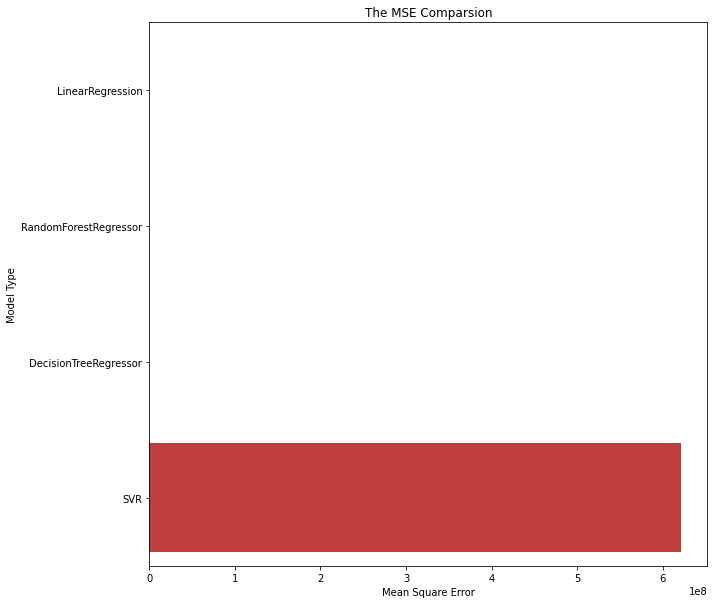

In [51]:
MSE_num = []
for i in range(4):
  MSE = mean_squared_error(y_test, Model[i].predict(x_test))
  MSE_num.append(MSE)
plt.figure(figsize = (10, 10))
plt.xlabel('Mean Square Error')
plt.ylabel('Model Type')
plt.title('The MSE Comparsion')
sns.barplot(x = MSE_num, y = ML_model)

#R Squared Score Comparision 


R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.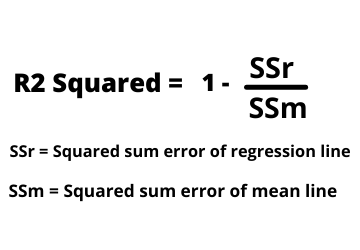

If the R2 score is zero then the above regression line by mean line is equal means 1 so 1-1 is zero. So, in this case, both lines are overlapping means model performance is worst, It is not capable to take advantage of the output column.

Second case is when the R2 score is 1, it means when the division term is zero and it will happen when the regression line does not make any mistake, it is perfect. In the real world, it is not possible.

So we can say that as our regression line moves towards perfection, R2 score move towards one. And the model performance improves.

The normal case is when the R2 score is between zero and one like 0.8 which means your model is capable to explain 80 per cent of the variance of data.

After comparing R_Square_Scoe of all the ml model, then we conclude Except SVR, all model give 1.0 r2 score.

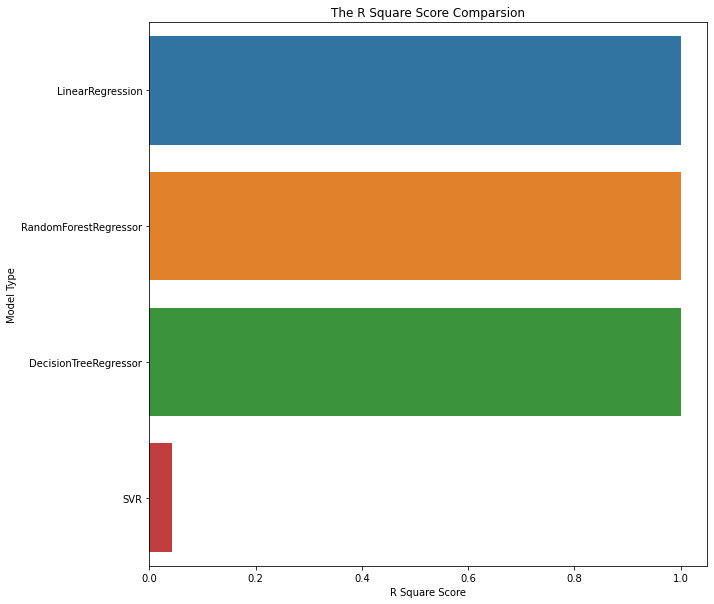

In [52]:
from sklearn.metrics import r2_score
R_square_num = []
for i in range(4):
  R_square = r2_score(y_test, Model[i].predict(x_test))
  R_square_num.append(R_square)
plt.figure(figsize = (10, 10))
plt.xlabel('R Square Score')
plt.ylabel('Model Type')
plt.title('The R Square Score Comparsion')
sns.barplot(x = R_square_num, y = ML_model)

#Predicting New Values with different ML

In [53]:
DTR.predict([[0,0,1,18,245,4,4,4,18,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([6155.3859025])

In [54]:
LR.predict([[0,0,1,18,245,4,4,4,18,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([4899.99999666])

In [55]:
RFR.predict([[0,0,1,18,245,4,4,4,18,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([5665.6133])

In [56]:
svr.predict([[0,0,1,18,245,4,4,4,18,0,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


array([100132.13569123])